### While there are several Python packages that are very useful in manipulating, visualizing, cleaning and modeling data, below some of the most popular and best maintained ones:
* Pandas (https://pandas.pydata.org/) | High-performance, easy-to-use data structures and data analysis tools
* Numpy (http://www.numpy.org/) | The fundamental package for scientific computing with Python
* Scipy (https://www.scipy.org/) | Ecosystem of open-source software for mathematics, science, and engineering
* Scikit-learn (http://scikit-learn.org) | Simple and efficient tools for data mining and data analysis
* Matplotlib (https://matplotlib.org/) | 2D plotting library which produces publication quality figures
* Plot.ly (https://plot.ly/) | Library for creating polished interactive plots
* Altair (https://altair-viz.github.io/) | Declarative statistical visualization library for Python

# Pandas / Matplotlib / Plot.ly / Altair Demo

##  <span style="color:red">US Baby Names 1880-2015</span>

The following datasets [(download here)](https://www.ssa.gov/oact/babynames/limits.html) contain a list of the most frequent names given to newborn babies in the United States each year. There are many things you can do with the dataset:

* Visualize the proportion of babies given a particular name (your own, or another name) over time.
* Determine the relative rank of a name.
* Determine the most popular names in each year or the names with largest increases or decreases.
* Analyze trends in names: vowels, consonants, length, overall diversity, changes in spelling, first and last letters.
* Analyze external sources of trends: biblical names, celebrities, demographic changes.

Modified from "Python for Data Analysis" by Wes McKinney.

Let's first open a single file and take a look at it:


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Note that here we are loading a dataset from a web URL. See with TAB what else can be done with read_csv()
dataset_url = 'https://raw.githubusercontent.com/cse44648/cse44648/master/datasets/baby-names/yob1880.txt'
names1880 = pd.read_csv(dataset_url,  names=['name', 'sex', 'births'])

In [4]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [5]:
names1880.shape

(2000, 3)

In [6]:
names1880['births'].describe()

count    2000.000000
mean      100.741000
std       466.098278
min         5.000000
25%         7.000000
50%        13.000000
75%        41.250000
max      9655.000000
Name: births, dtype: float64

In [7]:
names1880[names1880.births == 5]

,name,sex,births
835,Adelle,F,5
836,Adina,F,5
837,Adrienne,F,5
838,Albertine,F,5
839,Alys,F,5
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [8]:
names1880[names1880.births==5].head()

,name,sex,births
835,Adelle,F,5
836,Adina,F,5
837,Adrienne,F,5
838,Albertine,F,5
839,Alys,F,5


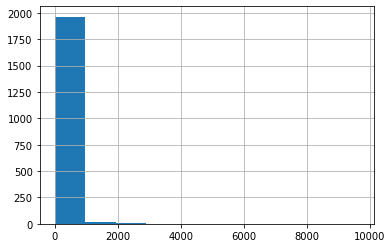

In [9]:
names1880["births"].hist();

In [10]:
# There are several different plot styles you can use with matplotlib
for style in plt.style.available:
    print(style)

bmh
classic
dark_background
fast
fivethirtyeight
ggplot
grayscale
seaborn-bright
seaborn-colorblind
seaborn-dark-palette
seaborn-dark
seaborn-darkgrid
seaborn-deep
seaborn-muted
seaborn-notebook
seaborn-paper
seaborn-pastel
seaborn-poster
seaborn-talk
seaborn-ticks
seaborn-white
seaborn-whitegrid
seaborn
Solarize_Light2
tableau-colorblind10
_classic_test


In [11]:
matplotlib.style.use('ggplot')

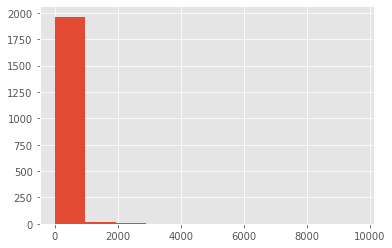

In [12]:
names1880["births"].hist();

Since we have numerous data files, the following snippet combines all of these data into a single pandas `DataFrame` and adds a `year` field.

In [11]:
years = range(1880, 2015)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'https://raw.githubusercontent.com/cse44648/cse44648/master/datasets/baby-names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame.
names = pd.concat(pieces, ignore_index=True)

In [12]:
# This would save the above dataframe for future use
names.to_csv('./data/us_baby_names.csv', index=False)

# The code above may take a while to run. Alternativelly, you can load the local copy of the dataset as below
#names = pd.read_csv("./data/us_baby_names.csv")

We can now perform several types of aggregation. For example, let's create a new `DataFrame` containing the total number of births per year, split by sex.

In [13]:
names.tail()

,name,sex,births,year
1825732,Zykeem,M,5,2014
1825733,Zymeer,M,5,2014
1825734,Zymiere,M,5,2014
1825735,Zyran,M,5,2014
1825736,Zyrin,M,5,2014


In [14]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [15]:
total_births.head()

sex,F,M
year,,
1880,90992,110490
1881,91953,100743
1882,107848,113686
1883,112318,104627
1884,129020,114443


Using the `plot()` function, we can very quickly draw a figure to illustrate this DataFrame.

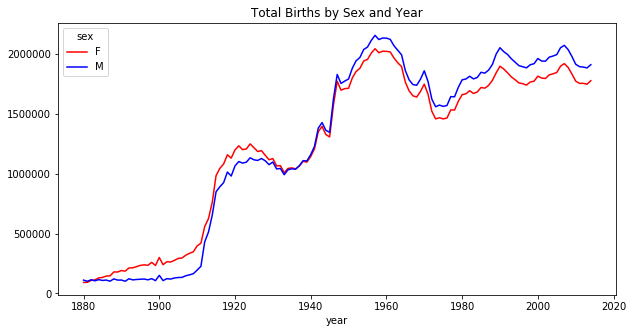

In [16]:
total_births.plot(figsize=(10,5), title='Total Births by Sex and Year', color=["red","blue"]);

### Interactive plot using Plot.ly

In [18]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [19]:
data = [
    go.Scatter(
        x=total_births.index,
        y=total_births["F"],
        name='F'
    ),
    go.Scatter(
        x=total_births.index,
        y=total_births["M"],
        name='M'
    )
]

# Edit the layout
layout = dict(title = 'US Baby Names Over Time',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Number of Births'),
              )

fig = dict(data=data, layout=layout)

In [20]:
iplot(fig)

Now suppose we would like to analyze how frequently the names _John_, _Mary_, _Pamela_, _Reid_, _Thomas_, and _Katricia_ occurr over time.

First we redefine total_births, this time aggregating data by name rather than sex. We then retrieve the subset of names that we are interested in and plot them.

In [21]:
matplotlib.style.use('seaborn-white')

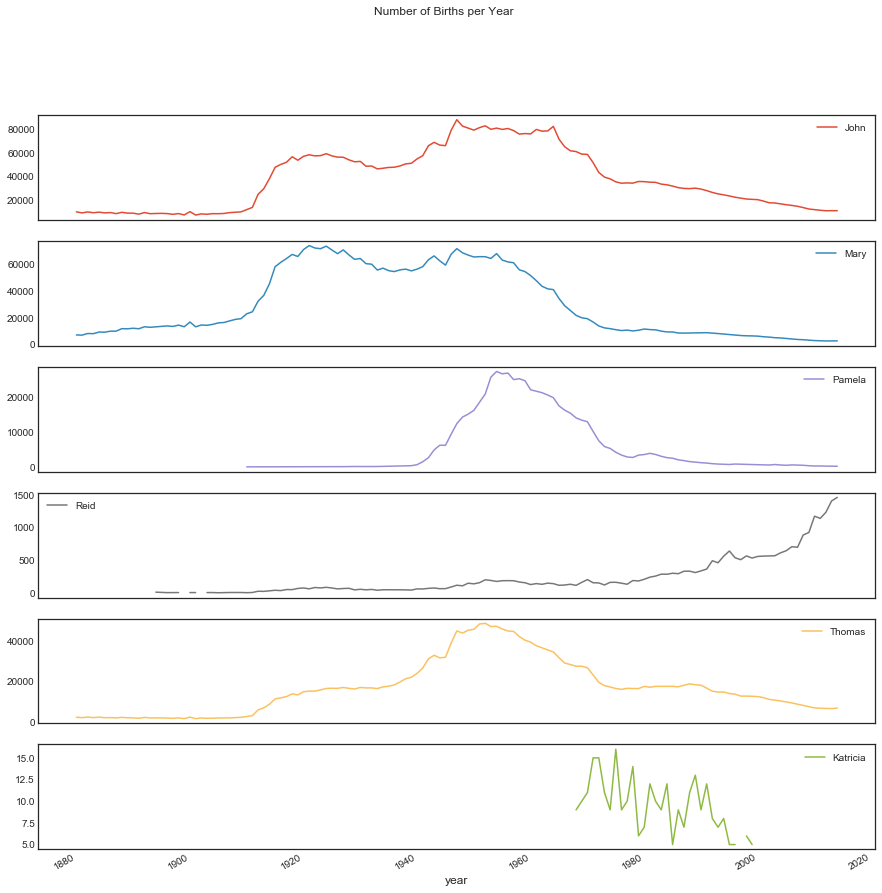

In [22]:
total_births = names.pivot_table('births', index='year', columns='name', aggfunc=sum)
subset = total_births[['John', 'Mary', 'Pamela', 'Reid', 'Thomas', 'Katricia']]
subset.plot(subplots=True, figsize=(15, 15), grid=False, title="Number of Births per Year");

### Gender neutral names

In [23]:
gender_neutral_name = names[names["name"] == "Everett"].pivot_table('births', index='year', columns='sex', aggfunc=sum)

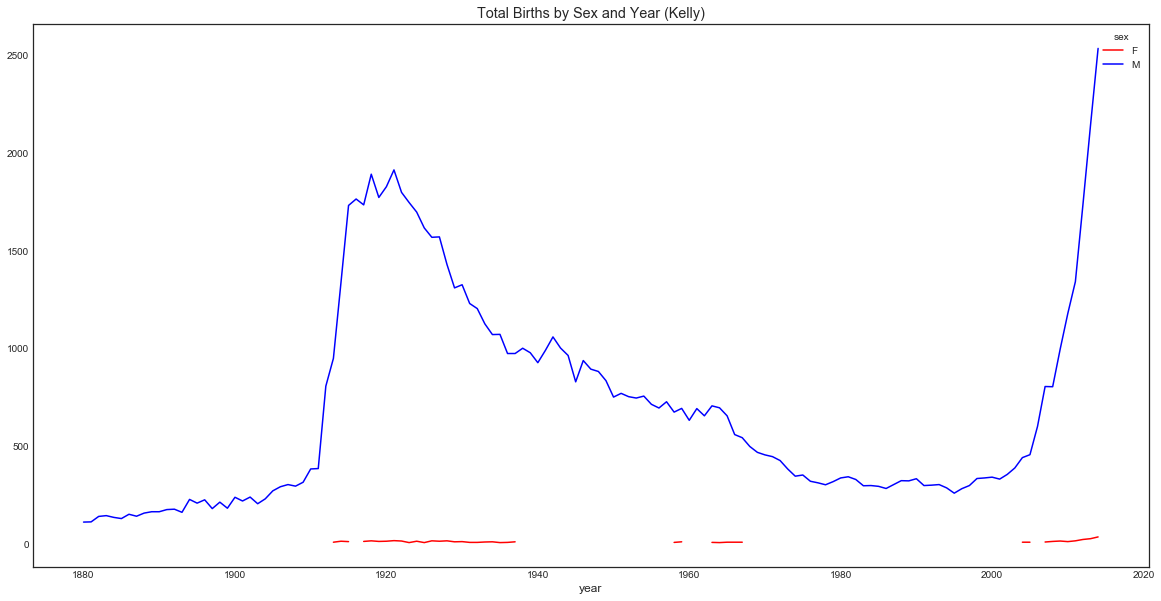

In [24]:
gender_neutral_name.plot(figsize=(20,10), title='Total Births by Sex and Year (Kelly)', color=["red","blue"]);

### Most strongly gender neutral names

In [25]:
names_by_gender = names.pivot_table("births", index="name", columns="sex", aggfunc="sum")

In [26]:
names_by_gender = names_by_gender.dropna()

In [27]:
names_by_gender.head(50)

sex,F,M
name,,
Aaden,5.0,3917.0
Aadi,16.0,667.0
Aadyn,16.0,387.0
Aalijah,107.0,155.0
Aaliyah,69874.0,84.0
Aamari,67.0,88.0
Aamir,6.0,1429.0
Aaren,282.0,717.0
Aareon,10.0,33.0


In [28]:
names_by_gender.loc["Aaden", "M"] = 0

In [29]:
names_by_gender.head()

sex,F,M
name,,
Aaden,5.0,0.0
Aadi,16.0,667.0
Aadyn,16.0,387.0
Aalijah,107.0,155.0
Aaliyah,69874.0,84.0


In [30]:
names_by_gender["M_F_ratio"] = names_by_gender["F"]/names_by_gender["M"]

In [31]:
gender_neutral_names = names_by_gender[(names_by_gender["M_F_ratio"] > 0.95) & (names_by_gender["M_F_ratio"] < 1.05)]
gender_neutral_names = gender_neutral_names.sort_values(by="F", ascending=False)

In [32]:
gender_neutral_names.head(50)

sex,F,M,M_F_ratio
name,,,
Kerry,48450.0,49420.0,0.980372
Kris,13437.0,13794.0,0.974119
Unknown,9295.0,9147.0,1.016180
Ivory,8408.0,8186.0,1.027119
Baby,5803.0,6037.0,0.961239
Michal,3572.0,3620.0,0.986740
Kodi,2364.0,2271.0,1.040951
Krishna,1714.0,1717.0,0.998253
Christan,1366.0,1403.0,0.973628


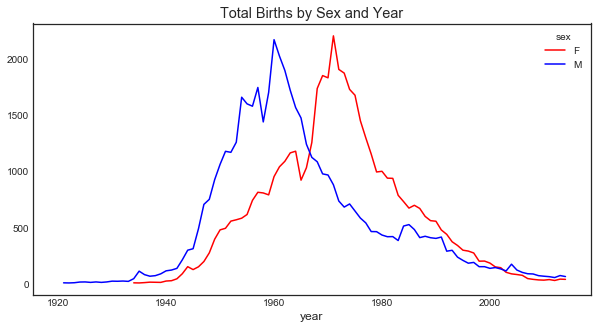

In [33]:
gender_neutral_name = names[names["name"] == "Kerry"].pivot_table('births', index='year', columns='sex', aggfunc=sum)
gender_neutral_name.plot(figsize=(10,5), title='Total Births by Sex and Year', color=["red","blue"]);